# Rejection Sampling
Rejection Sampling is one of the simplest sampling algorithm. Every introductory text about Monte Carlo method use this algorithm as a first example. The de facto example of this is to approximate pi.

As with MCMC method like Metropolis-Hastings and Gibbs Sampling, Rejection Sampling is used to draw samples from a complicated target distribution where direct sampling is hard. This can be done by using a proposal distribution `Q(x)` that is easy to sample from. This `Q(x)` has to have an important property, namely, `Q(x)` has to envelope the target distribution `P(x)`. That means, given a scaling factor `k`, it has to be `kQ(x) > P(x)`, for all `x`. In other words, our target distribution has to be entirely under our scaled proposal distribution.

For clearer picture, let's dive into the code.

In [3]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

## Our target distribution
def p(x):
    return st.norm.pdf(x, loc = 30, scale = 10) + st.norm.pdf(x, loc = 80, scale = 20)

## Our proposal distribution
def q(x):
    return st.norm.pdf(x, loc = 50, scale = 30)

## Find the scaling factor
x = np.arange(-50, 151)
k = max(p(x) / q(x))


def rejection_sampling(iter = 1000):
    samples = []
    
    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))
        
        if u <= p(z):
            samples.append(z)
            
    return np.array(samples)

The target distribution that I want to sample here is a mixture of Gaussian: `N(30, 10) + N(80, 20)`. Take note that this distribution is not normalized. Here's what it looks like.

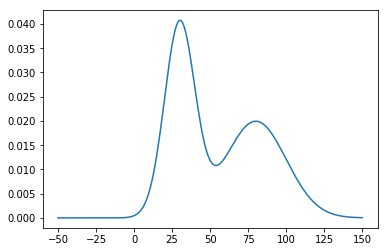

In [4]:
plt.plot(x, p(x))
plt.show()

Now, I'll pick `N(50, 30)` as my proposal distribution `Q(x)`.

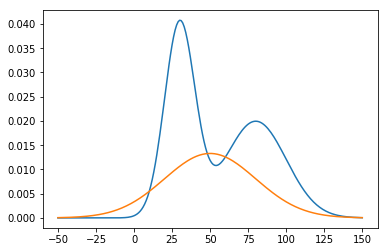

In [7]:
plt.plot(x, p(x))
plt.plot(x, q(x))
plt.show()

If we do Rejection Sampling on this `Q(x)` naively, it will surely failed, as those high probability areas of `P(x)` aren't covered by `Q(x)`. Intuitively, the acceptance rate will be lower if `Q(x)` isn't enveloping `P(x)`, resulting in having a lot less samples in those high probability areas than it should.

To remedy that, we need to find scaling factor `k`, so that `kQ(x)` will envelop `P(x)` entirely. To find it, we need to get the maximum ratio of `P(x)` and `Q(x)`. So it will just be `k = max(P(x) / Q(x)) for all x`.

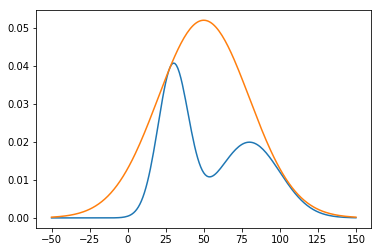

In [8]:
plt.plot(x, p(x))
plt.plot(x, k*q(x))
plt.show()

This is how rejection sampling works:
1. First we're going to take a sample from our proposal distribution `Q(x)`, `z ~ Q(x)`.
2. Next, we're going to take a uniform random number between zero and the height of our scaled proposal distribution at `z`, `u ~ Unif(0, kQ(z))`.
3. After that, we're going to evaluate the height of our target distribution at `z`, `P(z)`. If this height is greater or equal to our uniform random number, `P(z) >= u`, we accept the sample. Otherwise, reject the sample.

Given a long time to run and generating samples, then it will converge to `P(x)`. Let's see the result.

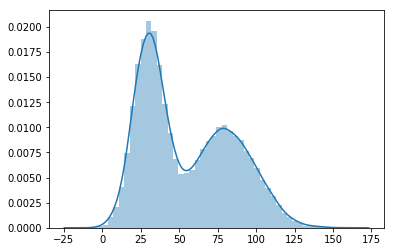

In [9]:
s = rejection_sampling(iter = 100000)
sns.distplot(s)

Recall that our target distribution that we used in Rejection Sampling is unnormalized. However, given the samples, we could reconstruct the proper distribution. So normalization doesn't really matter. The requirement of the target distribution hence relaxed, we just need a function proportional to our true target distribution.

Rejection Sampling sure is simple, but it has some drawback. We have to have a pretty good heuristic on choosing the proposal distribution `Q(x)`. It has to envelope the target distribution. Given a complicated target distribution, it's hard to know the shape of the proposal distribution.

Also when computing the scaling factor, we have to be careful to make it "just enough" enveloping the target distribution, as the rejection rate will be proportional to the ratio of `P(x)` and `Q(x)`. Having a really big `Q(x)` sure envelops `P(x)`, but it also means that there are a lot of wasted space that the algorithm will reject, which means a wasted computational time.